In [ ]:
!pip install langdetect
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

from textblob import TextBlob

from langdetect import detect
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
import pandas as pd

url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
df_old = pd.read_json(url, compression='gzip', lines=True)
df = df_old.sample(400000)
df = df.reset_index()

In [ ]:
df.to_csv("amazon.csv")

In [ ]:
from google.colab import files
files.download("amazon.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   index           400000 non-null  int64 
 1   reviewerID      400000 non-null  object
 2   asin            400000 non-null  object
 3   reviewerName    394135 non-null  object
 4   helpful         400000 non-null  object
 5   reviewText      400000 non-null  object
 6   overall         400000 non-null  int64 
 7   summary         400000 non-null  object
 8   unixReviewTime  400000 non-null  int64 
 9   reviewTime      400000 non-null  object
dtypes: int64(3), object(7)
memory usage: 30.5+ MB


In [ ]:
df

,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,716180,A2L6MO5825C7W4,B0036BGJ2I,R. Ross,"[11, 12]","Yes, as other reviews say, they do come scratc...",5,Great Cheap Gels,1330387200,"02 28, 2012"
1,731957,A3IW7BB2O79F3V,B0038WHCX0,Gordon Banks,"[0, 0]",This pack will hold a large DSLR (my D800) and...,5,Does everything I want,1356134400,"12 22, 2012"
2,286373,A2JQBUKWSKBF7Q,B000OUBQWM,Tony,"[0, 2]",I realize this is an inexpensive item but I ju...,3,"Eh, doesn't do much for me.",1295654400,"01 22, 2011"
3,827361,A11AYKR8GOW2HA,B003UT2E8E,Red Headed Book Worm,"[1, 1]",I was very pleased with this keyboard. The des...,5,Great,1394150400,"03 7, 2014"
4,320785,A35E38U31B8L3F,B000UX1060,Specific Gravity,"[2, 3]","Great case, great fit. If you take off the de...",5,perfect case,1210636800,"05 13, 2008"
...,...,...,...,...,...,...,...,...,...,...
399995,1403395,A2KOV8XWZOZ0FQ,B008KEPU8A,Juniorverse1,"[16, 16]","First, I'd like to start out by comparing this...",4,"Now with Android 4.0.3 Update. Plus, a compar...",1345593600,"08 22, 2012"
399996,534100,A3QNFP46L7TRSC,B001TK3D4A,W. Rivera,"[1, 2]","I waited and did lots of research, in the end,...",5,Lots of research over time; good investment.,1239494400,"04 12, 2009"
399997,280311,A9LED1ZU5BEZA,B000O7EXCA,Kyle G.,"[4, 4]",The 3.5mm end is a little bit bulky but works ...,4,Great cable,1362441600,"03 5, 2013"
399998,430424,A39H0TELFJ4665,B001BHOU8Y,quadcomm,"[5, 7]",I've never had a Flash Drive fail on me in the...,4,OCZ Diesel 8GB USB 2.0 Flash Drive,1240876800,"04 28, 2009"


In [ ]:
df['date'] = pd.to_datetime(df['unixReviewTime'],unit='s')
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df

,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,date,year,month,day
0,716180,A2L6MO5825C7W4,B0036BGJ2I,R. Ross,"[11, 12]","Yes, as other reviews say, they do come scratc...",5,Great Cheap Gels,1330387200,"02 28, 2012",2012-02-28,2012,2,28
1,731957,A3IW7BB2O79F3V,B0038WHCX0,Gordon Banks,"[0, 0]",This pack will hold a large DSLR (my D800) and...,5,Does everything I want,1356134400,"12 22, 2012",2012-12-22,2012,12,22
2,286373,A2JQBUKWSKBF7Q,B000OUBQWM,Tony,"[0, 2]",I realize this is an inexpensive item but I ju...,3,"Eh, doesn't do much for me.",1295654400,"01 22, 2011",2011-01-22,2011,1,22
3,827361,A11AYKR8GOW2HA,B003UT2E8E,Red Headed Book Worm,"[1, 1]",I was very pleased with this keyboard. The des...,5,Great,1394150400,"03 7, 2014",2014-03-07,2014,3,7
4,320785,A35E38U31B8L3F,B000UX1060,Specific Gravity,"[2, 3]","Great case, great fit. If you take off the de...",5,perfect case,1210636800,"05 13, 2008",2008-05-13,2008,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,1403395,A2KOV8XWZOZ0FQ,B008KEPU8A,Juniorverse1,"[16, 16]","First, I'd like to start out by comparing this...",4,"Now with Android 4.0.3 Update. Plus, a compar...",1345593600,"08 22, 2012",2012-08-22,2012,8,22
399996,534100,A3QNFP46L7TRSC,B001TK3D4A,W. Rivera,"[1, 2]","I waited and did lots of research, in the end,...",5,Lots of research over time; good investment.,1239494400,"04 12, 2009",2009-04-12,2009,4,12
399997,280311,A9LED1ZU5BEZA,B000O7EXCA,Kyle G.,"[4, 4]",The 3.5mm end is a little bit bulky but works ...,4,Great cable,1362441600,"03 5, 2013",2013-03-05,2013,3,5
399998,430424,A39H0TELFJ4665,B001BHOU8Y,quadcomm,"[5, 7]",I've never had a Flash Drive fail on me in the...,4,OCZ Diesel 8GB USB 2.0 Flash Drive,1240876800,"04 28, 2009",2009-04-28,2009,4,28


In [ ]:
del df["unixReviewTime"]
del df["date"]
del df["reviewTime"]
del df["helpful"]

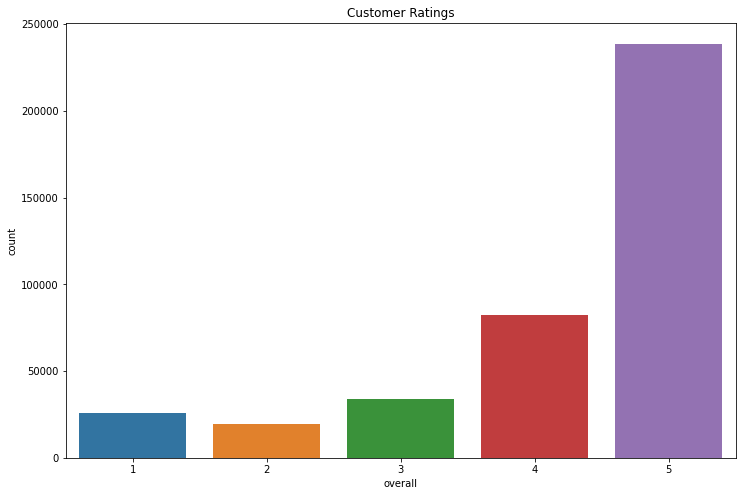

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Customer Ratings")
sns.countplot(df.overall);

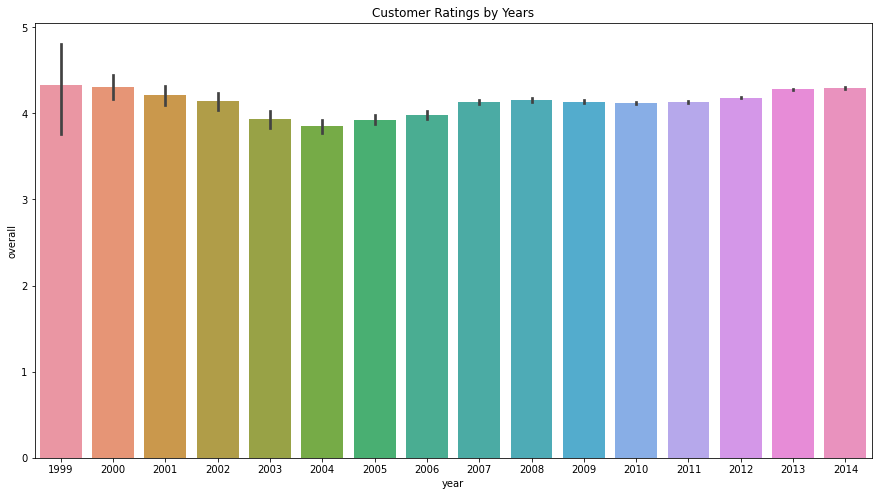

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Customer Ratings by Years")
sns.barplot(df.year,df.overall);

In [ ]:
df.loc[df["overall"] >  3, "sentiment"] = "Positive"
df.loc[df["overall"] == 3, "sentiment"] = "Neutral"
df.loc[df["overall"] <  3, "sentiment"] = "Negative"
df.sample(10)

,index,reviewerID,asin,reviewerName,reviewText,overall,summary,year,month,day,sentiment
36016,288852,A5CVG2ZKGMFJT,B000P6I4XO,"Jo AnneTitchen ""Jo A""",This is my go-to camera. I carry it with me e...,5,I love this camera!,2013,11,6,Positive
115002,1313586,A1ODH0GVFHD5X3,B007OAHDTU,"Daniel Greynolds ""Casual Buyer""","It works great, ive had no issues with it. I g...",5,Ive had this a little over a month,2014,6,30,Positive
286435,600291,A1RGK6Q5WUZUBA,B002HOPUPC,Robbster,The balance of features in this camera is very...,5,Great HD results with key features that set it...,2010,8,19,Positive
137428,1054191,A2Z80Q127S64HA,B004Z0S7K6,Frank Curley,I purchased this to store my photos in one pla...,4,big thing in a little package,2013,6,16,Positive
106473,1209934,ADDS3ITDSPL7L,B0064YWOQY,NaN,Replaced the 6 year old original battery on my...,5,it has better battery life than it did when it...,2014,7,15,Positive
60869,1274755,AS2FY9P0LASZA,B0075SUKIC,Casual Warrior,Began looking for an all weather camera that c...,5,Exactly what I needed,2012,12,24,Positive
38800,1493691,A13BXH56DZX247,B009T0NFXG,Sadie,I love this case! It does a great job of prot...,5,Great iPad Mini Case!!,2013,2,3,Positive
292160,337473,A2G5AGV1YXCFVJ,B000W9DJ1Q,Enrique D.,"It's so massive! Have no real complaints, just...",4,"Did it's job, but...",2014,3,22,Positive
150708,621687,A28J7R7B5TOD1A,B002LK2QJK,Cat Lover,"I only sat at my computer to use these, not mo...",3,Broke after 5 months of Normal Use,2009,10,24,Neutral
141457,184864,A3EMYEDSQE72HL,B000CP4ML6,Les Schmader,This is my second Lenmar DLP006 battery. The f...,5,Lenmar FZ28 Battery,2010,4,15,Positive


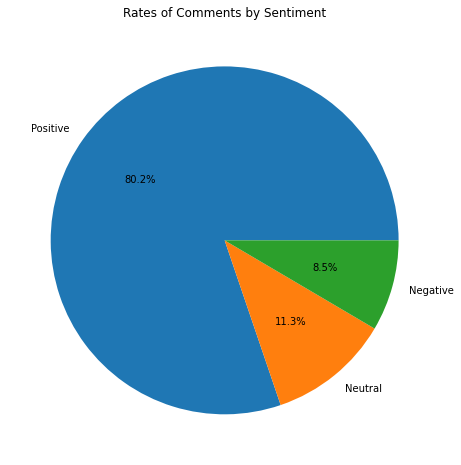

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Rates of Comments by Sentiment")
plt.pie(df.sentiment.value_counts(),autopct='%1.1f%%',labels = ["Positive","Neutral","Negative"]);

In [ ]:
from html import unescape
df.reviewText = df.reviewText.apply(unescape)

In [ ]:
df["operated"]=df["reviewText"].str.lower()
df["operated"]=df["reviewText"].str.replace("[^\w\s]","")
df["operated"]=df["reviewText"].str.replace("\d+","")
df["operated"]=df["reviewText"].str.replace("\n"," ").replace("\r","")

In [ ]:
from unicodedata import normalize
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
df["operated"] = df["operated"].apply(remove_accent) # aksanları kaldırdık

In [ ]:
import nltk
from nltk.corpus import stopwords,words
nltk.download('stopwords')
stop_words = stopwords.words("english")
stop_words = [word.replace("\'", "") for word in stop_words] # stop wordleri kaldırdım
df["operated"] = df["operated"].apply(lambda row: " ".join([token for token in row.split(" ") if token not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
df["operated"] = df["operated"].apply(lambda x: WordNetLemmatizer().lemmatize(x)) # lemmatize yaptık

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
corpora = df["operated"].values
tokenized = [corpus.split(" ") for corpus in corpora] # tokenize yaptık

In [ ]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50) # bigram ları bulduk (iki kelimeden oluşan anlatılar)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50) #trigram ları bulduk (üç kelimeden oluşan anlatılar)

In [ ]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

list(uni_gram_tokens)[:50]

['bowens',
 'chargerMousewheel',
 'calling.Talk',
 'ear--I',
 'calor',
 'microphone--a',
 '(Command)',
 "bag's",
 'pandora/etc.',
 'brushless',
 'highest,',
 '"gels"single',
 'bulb.Installation',
 'effort).I',
 'rz100',
 'euro',
 'headaches)',
 '18-55mm...',
 'them.SummaryThe',
 'creating.Oh',
 '551,',
 "Canon's.The",
 'motherboard.Good',
 'efficicent',
 'strangest',
 'power.Fortunately',
 "app's.",
 'Iconia***',
 'Cover*',
 'medically-required',
 "worksCons:-it's",
 'Easy!They',
 ')he',
 'f.stop/aperture',
 'heard.Overall',
 'STANDARD',
 '=).I',
 'hope???',
 'prompeted',
 'setup.Plug',
 'winner.PRICE',
 '75MB/s.For',
 'Movies.I',
 'collegiate',
 'beast.Really',
 'triedMC',
 'airplanewith',
 'RAM...seems',
 'However,my',
 'enabler']

In [ ]:
bi_condition = lambda x: x[1] >= bi_gram.min_count

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50]) # bigramları listeledik

['', 'I_previously', 'solid._', 'The_negative', 'battery_works', 'You_see', 'The_inside', 'I_run', 'might_want', "one_I've", 'today._', 'options._', 'video_audio', 'ever_used', "I'm_going", 'value_money.', 'device._I', '_It', 'makes_sense', 'product._It', 'I_bit', '(even_though', "you're_looking", 'GPS._', 'fully_charged', 'would_call', 'I_lost', 'part_I', 'works_well.', 'saying_I', 'get_one', 'up._It', 'The_black', 'monitor._', 'box_I', 'comes_handy', 'up,_I', 'here._', 'new_one.', 'long_time.', 'main_reason', 'set_I', 'recommend_them.', 'get_really', 'adjust_volume', "can't_really", 'mount._', "doesn't_work", 'drive._I', 'something_else.']


In [ ]:
tri_condition = lambda x: x[1] >= tri_gram.min_count

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50]) # trigramları listeledik

['place._The', 'well._If', 'them._This', 'design._The', 'monitor._I', 'features._I', 'is._It', 'give_5_stars', "I_couldn't_happier", 'more._The', 'Kindle_Fire_HD', 'cameras._I', 'these._They', 'itself._I', "well._It's", 'you._If', 'right._The', 'I_ever_used.', 'music._The', "You_can't_beat", 'charger._I', "-_I've", 'easy._The', 'so._I', 'perfect._It', 'photos._I', 'Just_make_sure', 'use._This', 'devices._The', 'TV._This', 'work._This', "it._I've", 'it._For', 'minutes._The', 'issue._The', 'mode._I', 'card._The', 'now._The', 'great._If', 'cover._The', 'great._They', 'That_said,_I', 'quickly._I', 'easy_set_up,', 'much._The', 'charge._I', 'settings._I', 'network._I', 'picture._The', 'best._I']


In [ ]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id) 

In [ ]:
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def lemma(text):
  words = TextBlob(text).words
  return [stemmer.stem(word) for word in words]

vect = CountVectorizer(lowercase=True, stop_words="english", ngram_range=(1,2), analyzer=lemma)

In [ ]:
x = df["operated"]
y = df["sentiment"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=13)

In [ ]:
x_train_dtm = vect.fit_transform(x_train,y_train)
x_test_dtm = vect.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB()
model_m = m.fit(x_train_dtm,y_train)
predict_m = m.predict(x_test_dtm)
accuracy_score(y_test,predict_m)

0.8310416666666667

In [ ]:
from sklearn.naive_bayes import BernoulliNB
b = BernoulliNB()
model_b = b.fit(x_train_dtm,y_train)
predict_b = b.predict(x_test_dtm)
accuracy_score(y_test,predict_b)

0.76025

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(x_train_dtm,y_train)
predict_lr = lr.predict(x_test_dtm)
accuracy_score(y_test,predict_lr)

0.8466833333333333

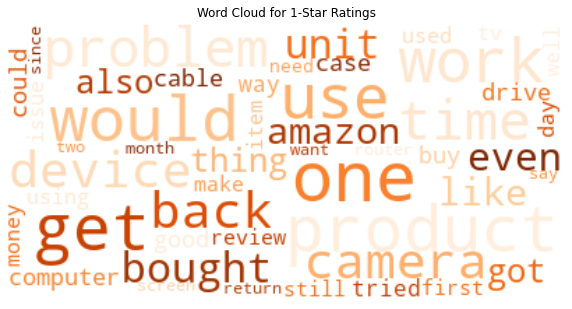

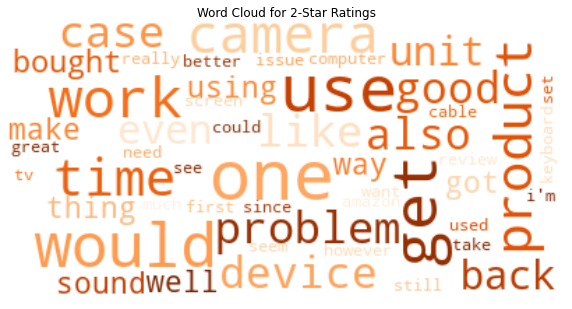

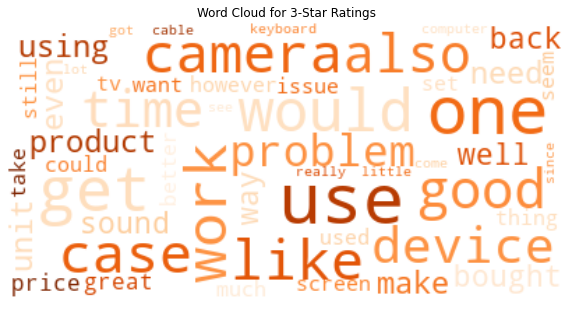

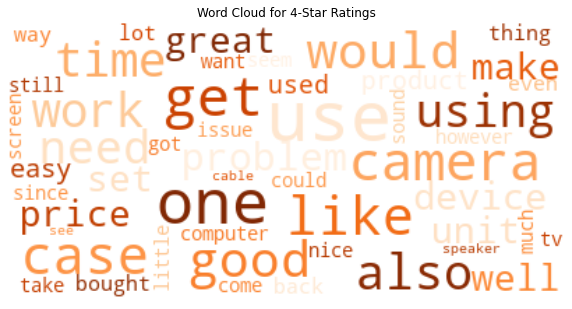

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df[df["overall"]==1]["reviewText"].values).lower()
two_star_text = " ".join(df[df["overall"]==2]["reviewText"].values).lower()
three_star_text = " ".join(df[df["overall"]==3]["reviewText"].values).lower()
four_star_text = " ".join(df[df["overall"]==4]["reviewText"].values).lower()
five_star_text = " ".join(df[df["overall"]==5]["reviewText"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()